Heart Risk Analysis

Data Collection and Exploration:

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading Dataset 
df=pd.read_csv('Medicaldataset.csv')

In [3]:
#Showing first 5 rows
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
#Showing last 5 rows
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [5]:
#Rows and columns in a dataset
df.shape

(1319, 9)

In [6]:
# Columns Name
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [7]:
#Non-null value and data-type of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [8]:
#Descriptive Statistics
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Data Cleaning and Transformation:

In [9]:
#Null Value in each column
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

There are not any missing values in all columns.

In [10]:
#removing duplicate rows
df.drop_duplicates()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


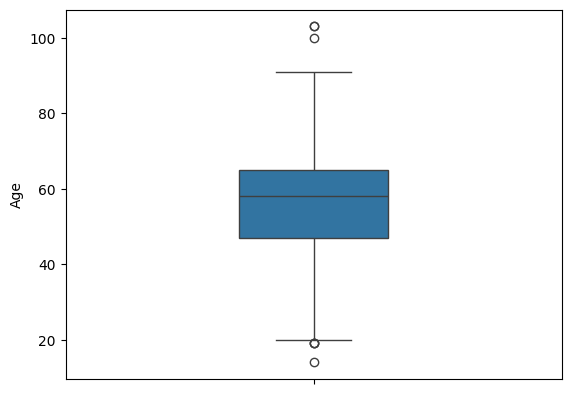

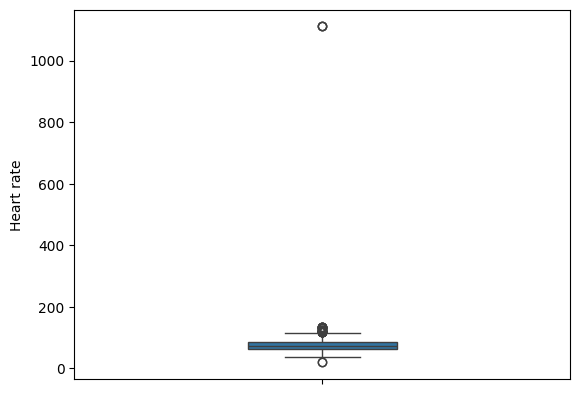

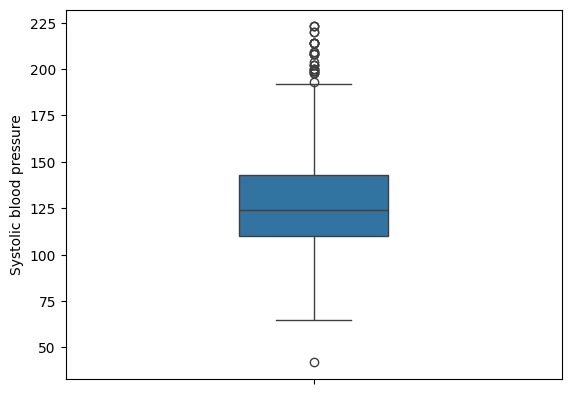

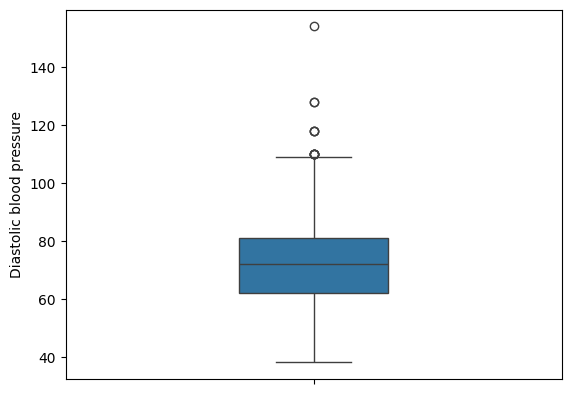

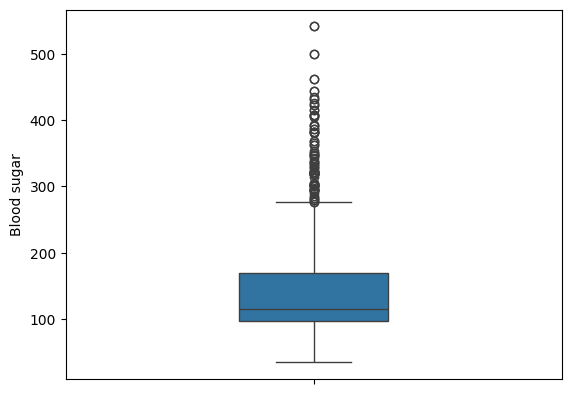

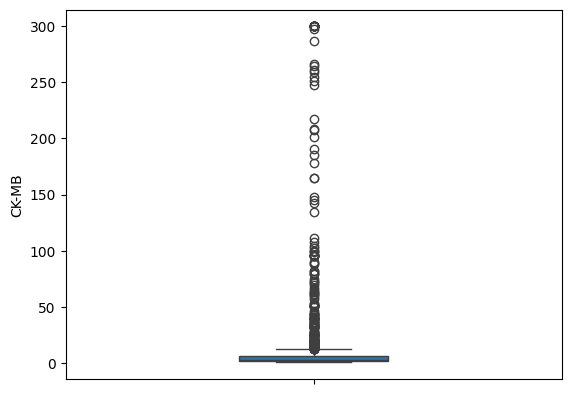

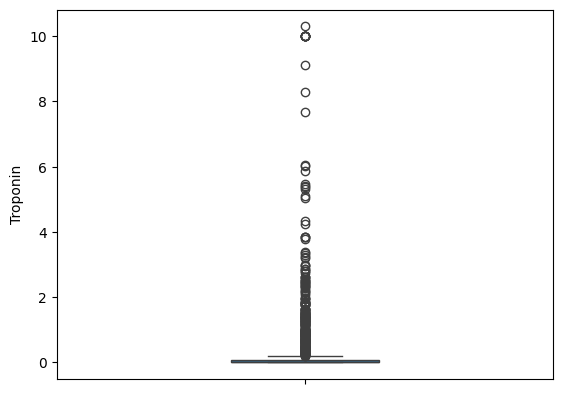

In [11]:
#Checking outliers using boxplot
plot=['Age','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']
for i in plot:
    sns.boxplot(y=df[i],width=0.3)
    plt.show()


Observation:
- Outliers are present in all the columns.

In [12]:
#Showing number of outliers in a dataset
for i in plot:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)

    IQR=Q3-Q1

    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    outlier=df[(df[i]<lower)|(df[i]>upper)]
    print(f'Number of outliers in {i}: {len(outlier)}')

Number of outliers in Age: 7
Number of outliers in Heart rate: 30
Number of outliers in Systolic blood pressure: 32
Number of outliers in Diastolic blood pressure: 12
Number of outliers in Blood sugar: 92
Number of outliers in CK-MB: 205
Number of outliers in Troponin: 257


In [13]:
#Encoding Categorical column
df_encoded=pd.get_dummies(df,columns=df.select_dtypes(include='object').columns,drop_first=True,dtype=int)
df_encoded


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result_positive
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


Data Visualization:


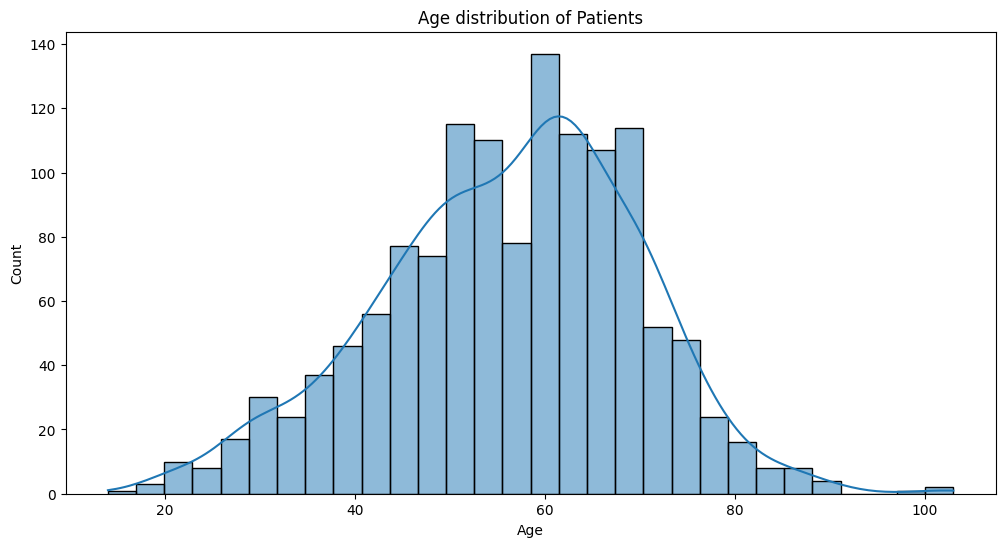

In [14]:
#Distribution of Age 
plt.figure(figsize=(12,6))
sns.histplot(df['Age'],kde=True,bins=30)
plt.title('Age distribution of Patients')
plt.show()

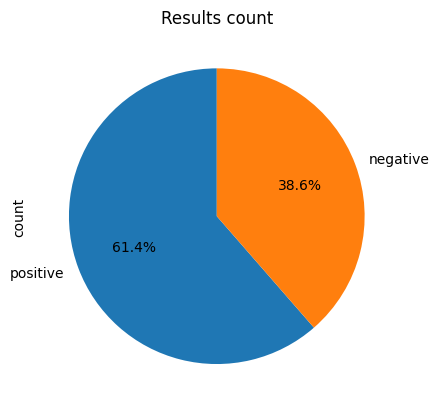

In [15]:
#Pie-chart showing the % of people affected by Heart problems
df['Result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Results count')
plt.show()

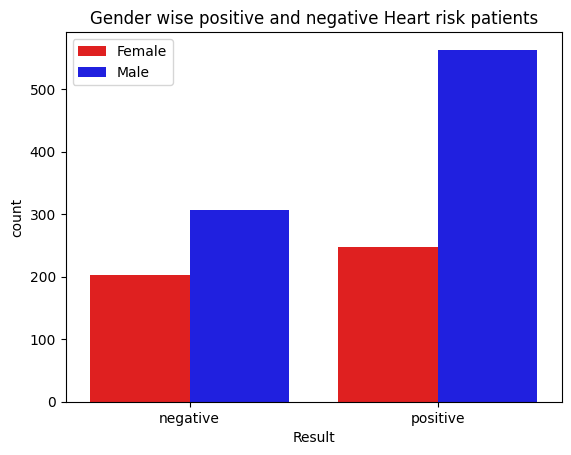

In [16]:
#Gender wise positive and negative Heart risk patients
sns.countplot(data=df, x='Result',hue='Gender',palette=['red','blue'])
plt.title('Gender wise positive and negative Heart risk patients')
plt.legend(labels=['Female','Male'])
plt.show()

Observation:
- Male patients are more likely to have Heart Risk compared to female patients.

<Figure size 1200x600 with 0 Axes>

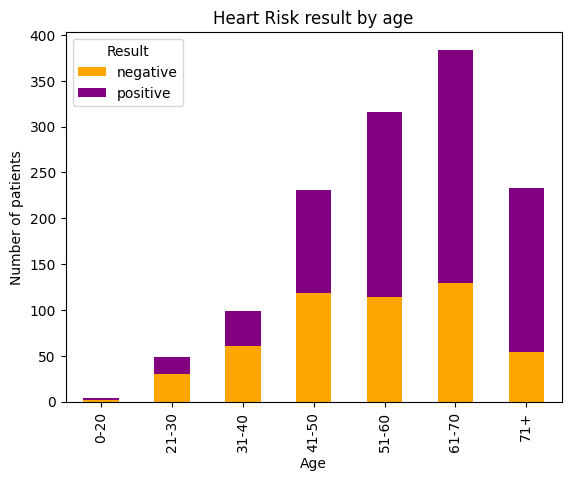

In [17]:
#Heart Risk result by age
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped=df.groupby(['Age','Result']).size().unstack()

plt.figure(figsize=(12,6))
grouped.plot(kind='bar',stacked=True,color=['orange','purple'])

plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Heart Risk result by age')
plt.xticks(rotation=90)
plt.show()

Observation:
- Younger age group is less likely to have Heart Risk. 
- As age increases, number of Heart risk disease will also increase over time.
- People of age group 61-70 are more likely to have Heart risk.

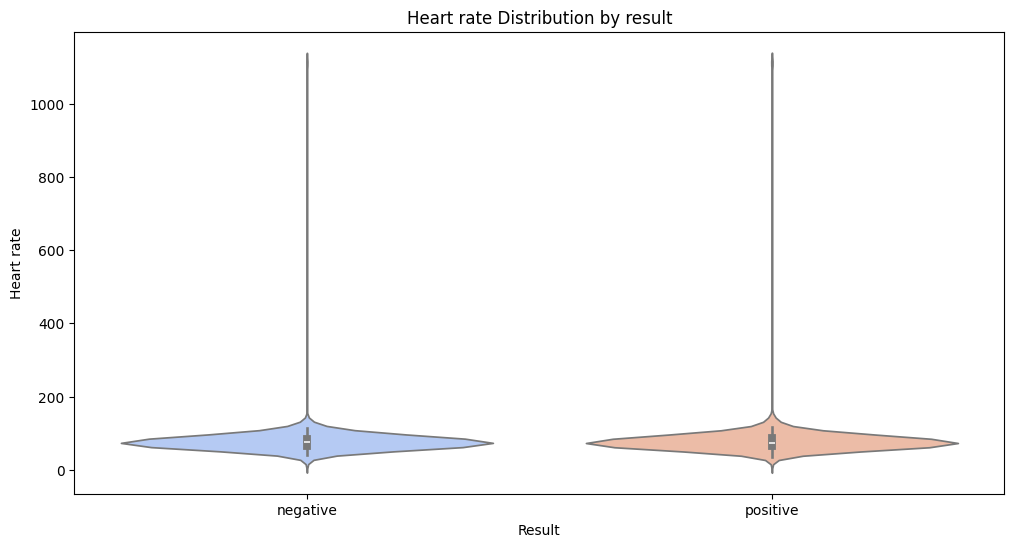

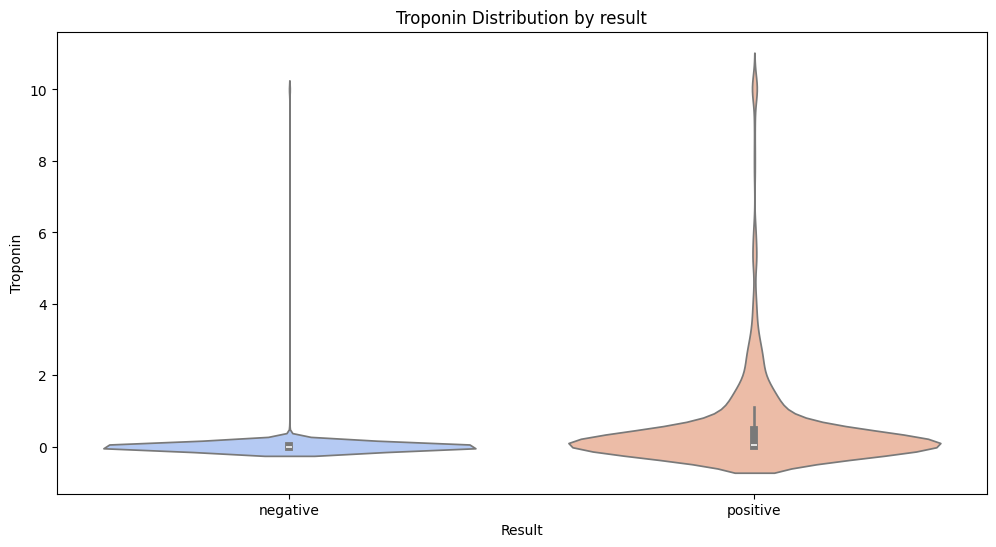

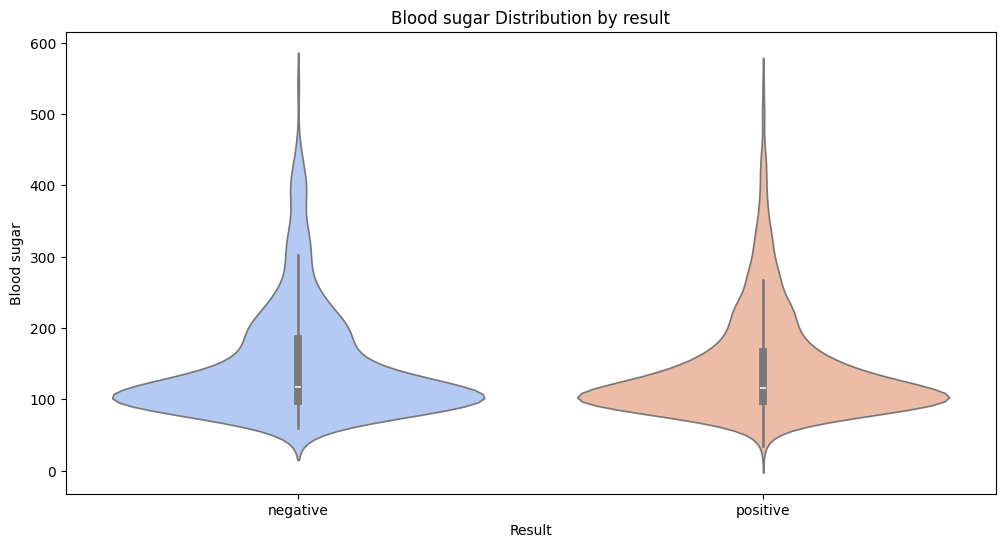

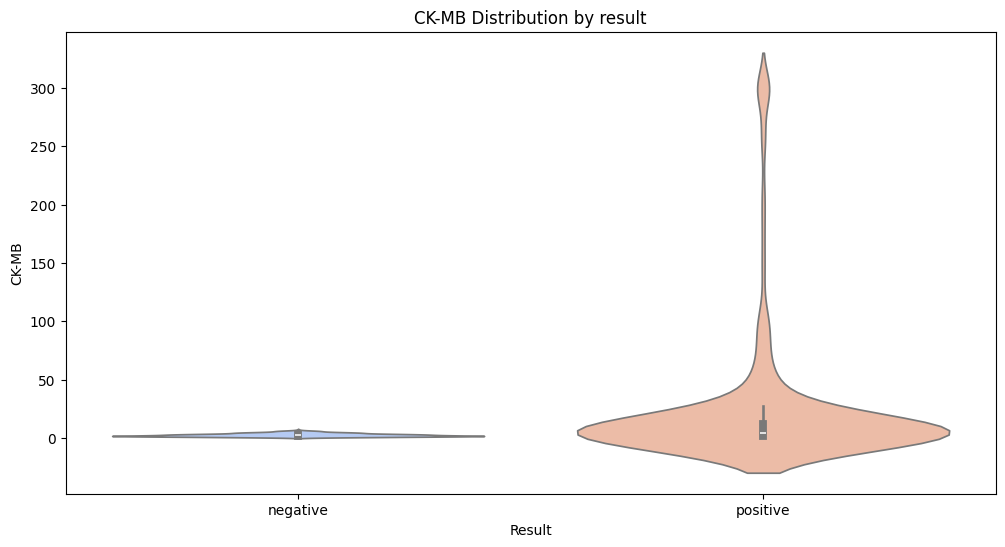

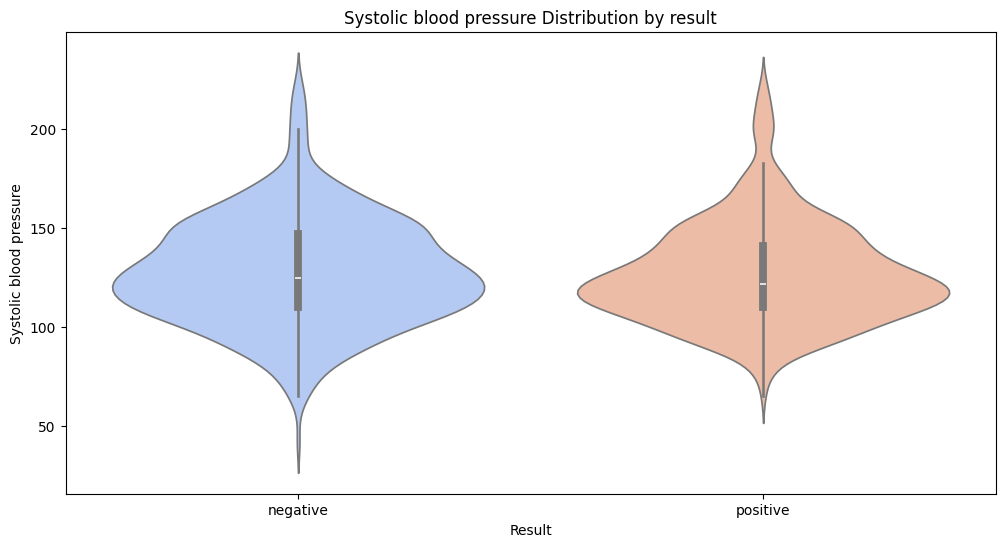

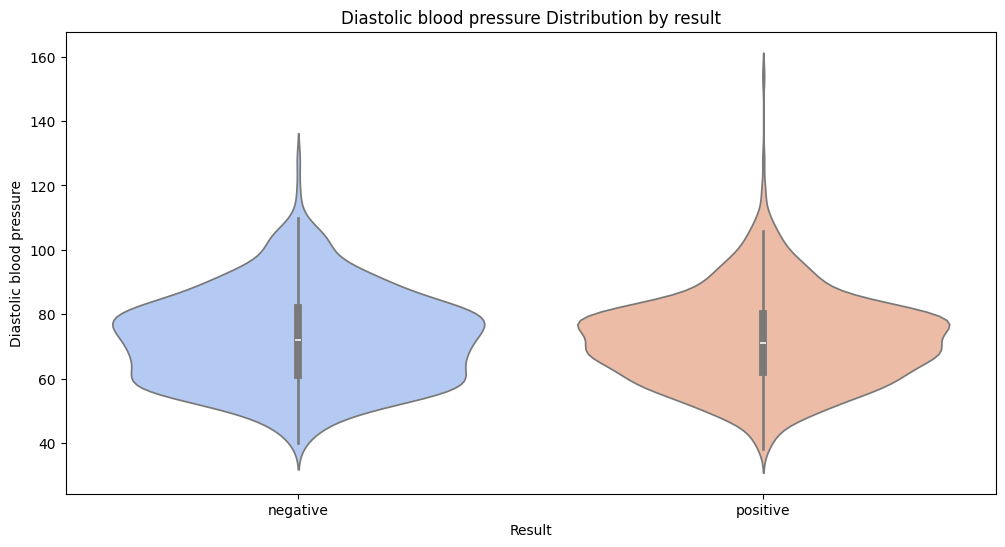

In [18]:
#Violin Plot for each features
features=['Heart rate','Troponin','Blood sugar','CK-MB','Systolic blood pressure','Diastolic blood pressure']

for i in features:
    plt.figure(figsize=(12,6))
    sns.violinplot(x='Result',y=i,data=df,palette='coolwarm')
    plt.title(f'{i} Distribution by result')
    plt.show()

Observation:
1. Heart rate vs Result
- The distribution of Heart rate is relatively similar for both groups.
 - However:

     Positive patients have a slightly higher concentration of heart rates around 90–110.

     Negative patients are more evenly distributed.

This suggests heart rate may help, but alone it's not a strong differentiator.

2. Troponin vs Result:
     Positive cases have a right-skewed distribution — higher troponin levels (spikes in 0.1 to 1.0+ range).

     Negative cases have very low and tight troponin values around 0.0–0.02.

Troponin is clearly an important biomarker for heart issues in your dataset — high troponin is strongly associated with heart disease.

3. . Blood Sugar vs Result:
- Blood sugar is higher and more spread out in positive cases.
  Positive group shows wider range (up to 400+).

  Negative group is more centered around 250–300.

While not as clear-cut as Troponin, elevated blood sugar appears to be more common in positive cases.

4. CK-MB vs Result:
- Negative cases show very low and tightly clustered CK-MB levels, mostly below 10, indicating normal cardiac enzyme levels.

Positive cases have significantly higher and more variable CK-MB values, with some extreme outliers, suggesting a strong association with heart disease.

5. Systolic Blood Pressure vs Result:
- Both positive and negative cases show a similar central tendency in systolic blood pressure, with medians around 120–130 mmHg.

However, negative cases display a wider distribution with more extreme values, indicating greater variability compared to positive cases.

6. Diastolic blood pressure vs result:
- Diastolic blood pressure distributions are similar for both positive and negative cases, with medians around 70–75 mmHg.

Negative cases show slightly broader variability, but overall, diastolic pressure does not distinctly differentiate between the two outcomes.

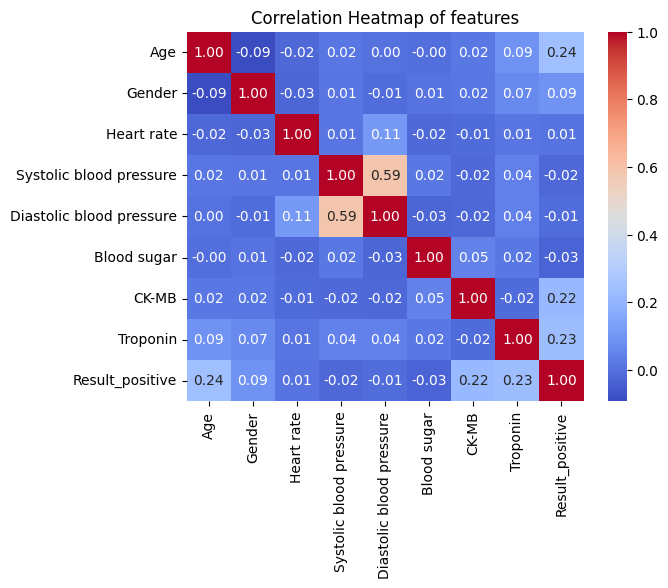

In [19]:
#Correlation between features
sns.heatmap(df_encoded.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of features')
plt.show()

In [20]:
#Making Features & Target
X=df_encoded.drop('Result_positive',axis=1)
y=df_encoded['Result_positive']

In [21]:
#Train-Test Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=142)

In [22]:
#Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [23]:
#Fit the data
model.fit(X_train,y_train)

DecisionTreeClassifier()

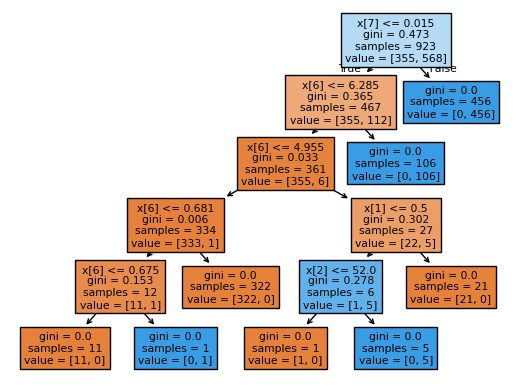

In [24]:
#Visualizing the Decision Tree
from sklearn.tree import plot_tree
plot_tree(model,filled=True)
plt.show()

In [25]:
#Prediction for the model
y_pred=model.predict(X_test)

In [26]:
#Evaluating confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[150   4]
 [  4 238]]
0.9797979797979798
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.98      0.98      0.98       242

    accuracy                           0.98       396
   macro avg       0.98      0.98      0.98       396
weighted avg       0.98      0.98      0.98       396



In [27]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[3,5,10],'min_samples_split':[2,5,10],'criterion':['gini','entropy']}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)
print('Best parameters:',grid.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


Key Insights:
- Male patients of age 50-60 are more likely to suffer from Heart risk diseases.
- Troponin and CK-MB are the major parameters for Heart diseases.
